In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rc, cm
from time import sleep
import pickle

In [3]:
import numpy as np
import pandas as pd

In [4]:
from IPython.display import Image
rc('animation', html='html5')

In [5]:
import brian2 as b2

In [6]:
from utilities import get_matrix_from_file

In [7]:
runsdir = '/Users/spb/Dropbox/Work/research/neuroml/stdp_learning/runs'

In [8]:
with open(f'{runsdir}/highintensity/output/saved.pickle', 'rb') as f:
    saveobj = pickle.load(f)

Need efficient code using saveobj to do the following:

* check input spike train by visualising spikes for a few examples and comparing to label
* visualise spikes in processing layer excitory and inhibitory neurons
* plot distributions of spiking rates in processing layer excitory neurons
* identify assignments between processing layer excitory neurons and labels
* get prediction (and 'strength' = spike rate) for each example
* examine and plot weights

In [10]:
from analyse import process_spike_trains, bin_spike_trains

In [14]:
spikes = process_spike_trains(saveobj['spike_monitors'], saveobj['total_example_time'])
spikecounts = bin_spike_trains(spikes, len(saveobj['labels']))

In [12]:
from spike_animation import spike_animation

In [12]:
anim = spike_animation(spikes, saveobj['total_example_time'])

In [13]:
Image(url='spikes_example.gif')

In [12]:
from analyse import plot_spike_distribution

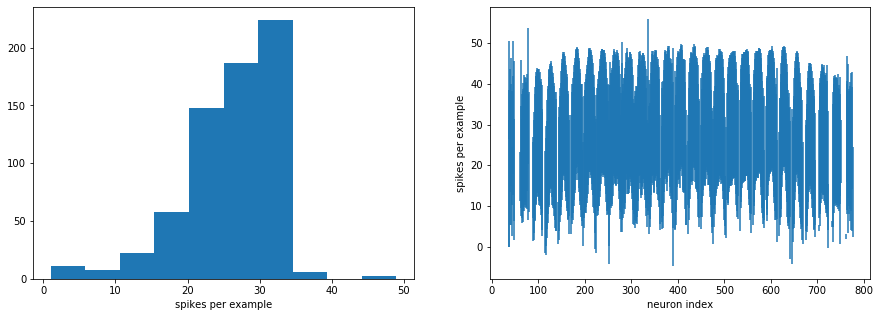

In [46]:
plot_spike_distribution(spikecounts['Xe']);

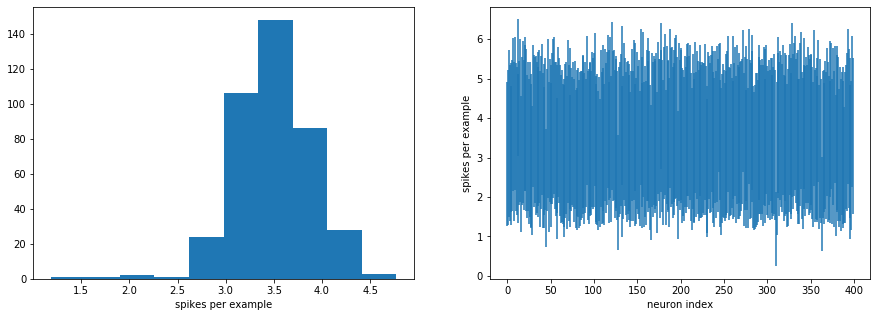

In [47]:
plot_spike_distribution(spikecounts['Ae']);

In [32]:
labels = pd.DataFrame({'label': saveobj['labels']}).rename_axis('example_idx')

In [25]:
from utilities import get_assignments

In [36]:
assignments = get_assignments(spikecounts['Ae'], labels)

In [43]:
from analyse import plot_assignment_distribution

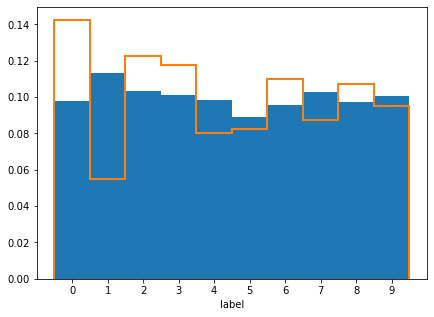

In [60]:
plot_assignment_distribution(assignments, labels)

In [50]:
from utilities import get_predictions

In [61]:
predictions = get_predictions(spikecounts['Ae'], assignments, labels)

In [62]:
accuracy = (predictions['assignment'] == predictions['label']).sum() / len(predictions)

In [63]:
accuracy

0.8245

In [64]:
weights = get_matrix_from_file(f'{runsdir}/norm/weights/XeAe.npy')

In [65]:
from utilities import plot_weights

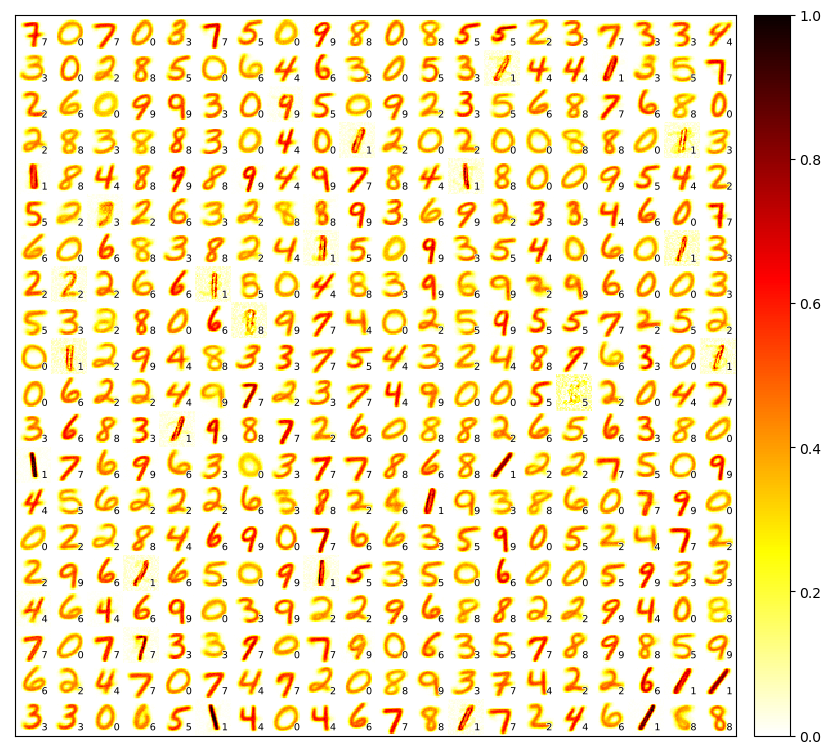

In [86]:
plot_weights(weights, assignments)

In [87]:
theta = np.load(f'{runsdir}/norm/weights/theta_A.npy')

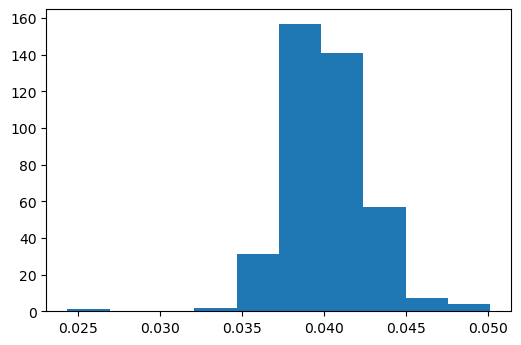

In [88]:
plt.hist(theta);

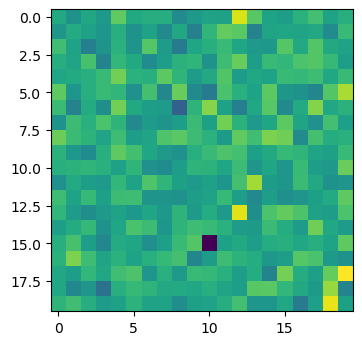

In [89]:
plt.imshow(theta.reshape((int(np.sqrt(len(theta))), -1)));

## Compare with results from original Brian1 code

In [ ]:
inputLabels = np.load('../stdp-mnist/activity/inputNumbers10000.npy')

In [32]:
resultPopVecs = np.load('../stdp-mnist/activity/resultPopVecs10000.npy').astype(np.int)

In [33]:
(inputLabels == labels['label']).all()

True

In [34]:
x = pd.DataFrame(columns=['tbin', 'i', 'count'], dtype='int')

for i in np.arange(10000):
    df = pd.DataFrame({'tbin': i, 'i': np.arange(400), 'count': resultPopVecs[i]})
    df = df[df['count'] > 0]
    x = x.append(df)
    x = x.reset_index(drop=True)

In [35]:
spikecounts_Ae_brian1 = x.set_index(['tbin', 'i'])['count']

In [36]:
df = labels.join(spikecounts_Ae_brian1).reset_index(1)

In [37]:
assignments_brian1 = get_assignments(spikecounts_Ae_brian1, labels)

In [38]:
(assignments_brian1 == assignments).values.all()

False

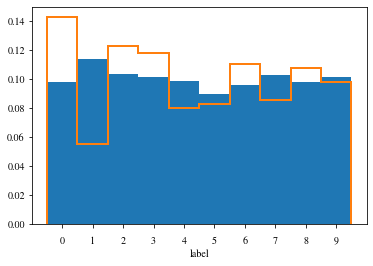

In [39]:
plot_assignment_distribution(assignments_brian1, labels)

In [40]:
predictions_brian1 = get_predictions(spikecounts_Ae_brian1, assignments_brian1, labels)

In [41]:
accuracy_brian1 = (predictions_brian1['assignment'] == predictions_brian1['label']).sum() / len(predictions_brian1)

In [42]:
accuracy_brian1

0.8721

In [43]:
weights_brian1 = get_matrix_from_file('weights/XeAe.npy')

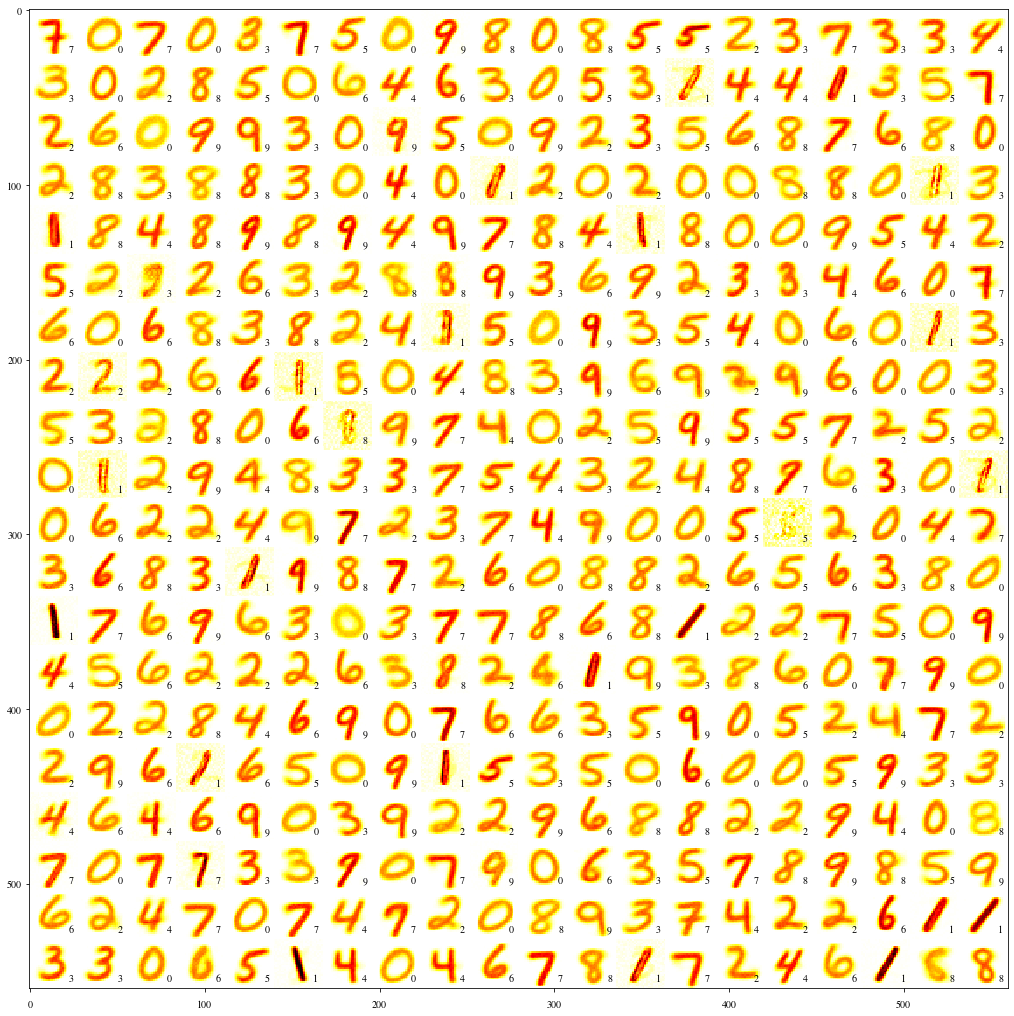

In [44]:
plot_weights(weights_brian1, assignments_brian1)